In [8]:
# ✅ Essential Imports
import pandas as pd
import numpy as np

# ✅ Load your cleaned dataset
final_df = pd.read_csv("final_df.csv")

# ✅ Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# ✅ Show the first few rows to confirm it's loaded
print(final_df.head())


   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment  IsHoliday_y Type    Size  Year  Month  Day  
0         8.106   

In [9]:
# 🎯 Target: Weekly_Sales
y = final_df['Weekly_Sales']

# 🧾 Features: drop unnecessary/non-numeric columns
X = final_df.drop(['Weekly_Sales', 'Date'], axis=1)


In [10]:
from sklearn.model_selection import train_test_split

# 🎯 Target Variable
target = 'Weekly_Sales'

# 🧠 Features (drop non-numeric or unnecessary columns)
X = final_df.drop(['Weekly_Sales', 'Date', 'IsHoliday_y'], axis=1)
y = final_df['Weekly_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (337256, 17)
Testing data shape: (84314, 17)


In [14]:
# Drop the original 'Type' column if it's still there
if 'Type' in final_df.columns:
    final_df = final_df.drop(columns=['Type'])

# Check again to be safe
print(final_df.select_dtypes(include='object').columns.tolist())


[]


In [23]:
X = final_df.drop(['Weekly_Sales', 'Date'], axis=1)
y = final_df['Weekly_Sales']


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# ✅ Sample the data for quick experimentation (optional but helps speed)
X_sampled = X.sample(frac=0.3, random_state=42)
y_sampled = y.loc[X_sampled.index]

# 🧪 Split the sampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_sampled, y_sampled, test_size=0.2, random_state=42
)

# ⚡ Fast Training with fewer trees and limited depth
rf_model = RandomForestRegressor(
    n_estimators=100,        # Lower number of trees
    max_depth=10,           # Limit tree depth
    max_features='sqrt',    # Use fewer features at each split
    n_jobs=-1,              # Use all cores
    random_state=42
)

# 🚀 Train
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


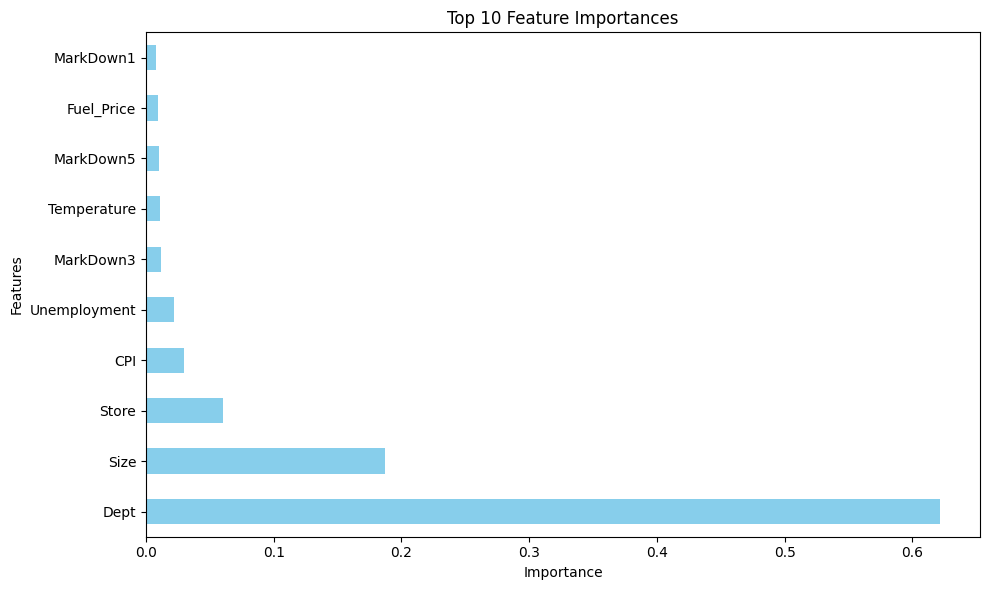

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [22]:
##(Post-Training Analysis):

In [26]:
##1️⃣ Evaluate the Model Performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Performance:")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


📊 Model Performance:
R2 Score: 0.5459
RMSE: 15194.09
MAE: 9739.59


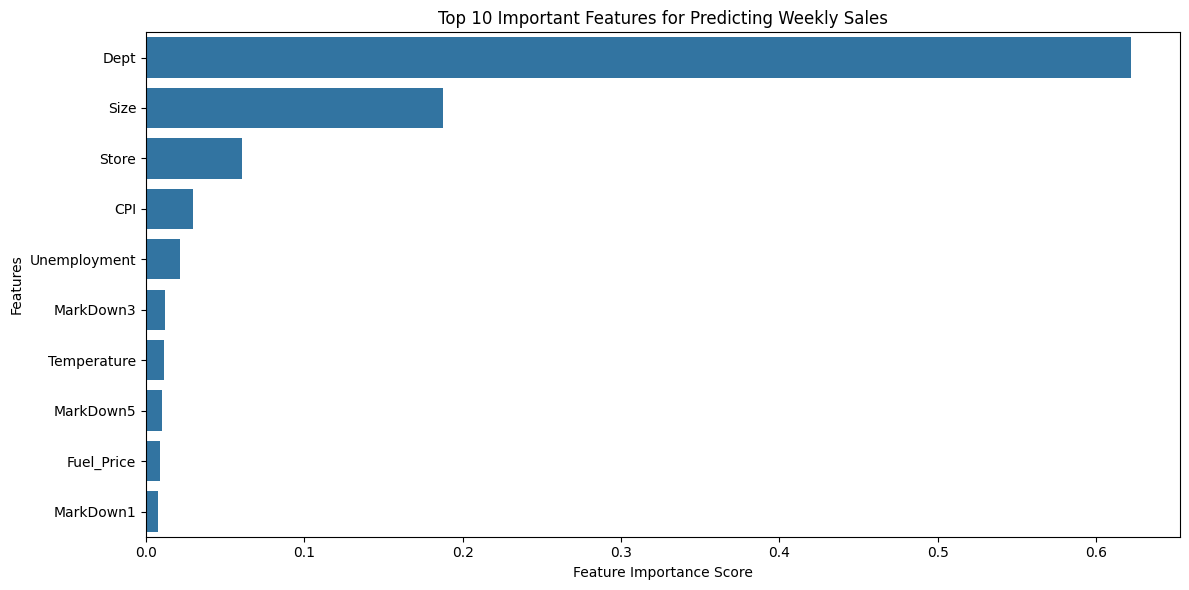

In [27]:
##Feature Importance (Understand what drives sales)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top important features
importances = rf_model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features for Predicting Weekly Sales")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [28]:
##3️⃣ Save the Trained Model (for deployment later)
import joblib

# Save model to disk
joblib.dump(rf_model, "rf_final_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [29]:
# Show the first few rows of holiday columns
print(final_df[['IsHoliday_x', 'IsHoliday_y']].head())


   IsHoliday_x  IsHoliday_y
0        False        False
1         True         True
2        False        False
3        False        False
4        False        False


In [30]:
# Check if both columns are identical
same = (final_df['IsHoliday_x'] == final_df['IsHoliday_y']).all()
print("Are both IsHoliday columns identical?", same)


Are both IsHoliday columns identical? True


In [31]:
print("Unique values in IsHoliday_x:", final_df['IsHoliday_x'].unique())
print("Unique values in IsHoliday_y:", final_df['IsHoliday_y'].unique())


Unique values in IsHoliday_x: [False  True]
Unique values in IsHoliday_y: [False  True]


In [6]:
final_df.drop(columns=['IsHoliday_x'], inplace=True)
final_df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)


In [33]:
print(X_train.columns.tolist())



['Store', 'Dept', 'IsHoliday_x', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Size', 'Year', 'Month', 'Day']


In [34]:
joblib.dump(X_train.columns.tolist(), "model/feature_names.pkl")


['model/feature_names.pkl']

In [36]:
# ✅ Save test results for the dashboard
y_test.to_csv("y_test.csv", index=False)
pd.DataFrame(rf_model.predict(X_test), columns=["Predicted"]).to_csv("y_pred.csv", index=False)
